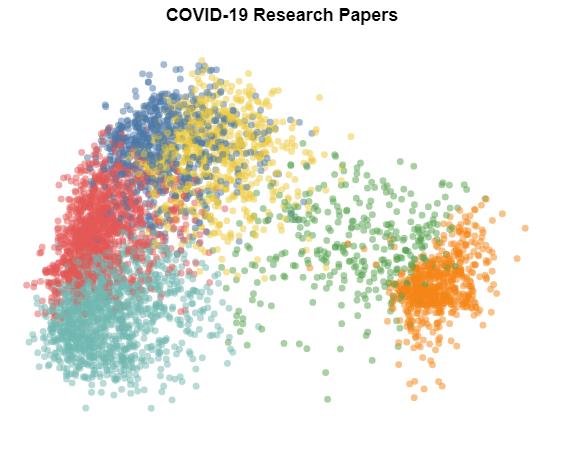

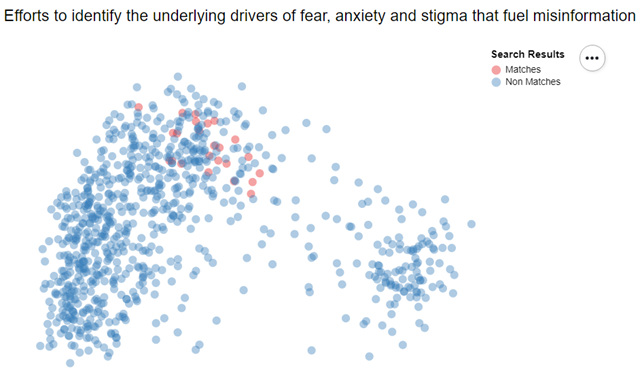

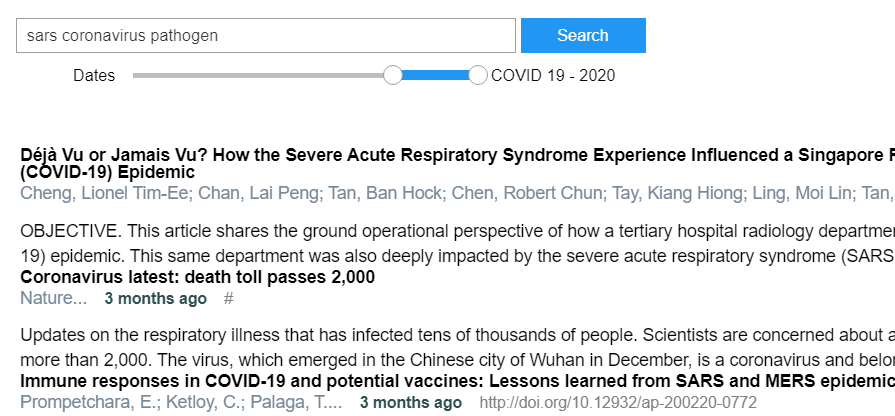

# 1.  Installing the dgunning/cord19 Library

The code for this kernel is maintained at https://github.com/dgunning/cord19. To install it in the Kaggle kernel, the Internet must be set to ON.

In [1]:
!pip install -U git+https://github.com/dgunning/cord19.git

  Cloning https://github.com/dgunning/cord19.git to /tmp/pip-req-build-_ez4ocus
  Running command git clone -q https://github.com/dgunning/cord19.git /tmp/pip-req-build-_ez4ocus
     |████████████████████████████████| 152 kB 9.4 MB/s 
     |████████████████████████████████| 914 kB 25.6 MB/s 
     |████████████████████████████████| 489 kB 52.0 MB/s 
  Created wheel for cord19: filename=cord19-0.4.0-py3-none-any.whl size=60265419 sha256=0bf76a077cede0515c17d28a5e820deaf54161cc144d45349448d8465b9f75d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-my8yq6ep/wheels/b5/5f/c9/e8f1f0ffb84f0824610ea8137bb5492ccde4a8d4b794119c2d
  Created wheel for rank-bm25: filename=rank_bm25-0.2-py3-none-any.whl size=4161 sha256=25dfa1cdfd3f5e59382e166a0512afa8fd4f3bb9c1216ea1c6b0b2b63a662fdb
  Stored in directory: /root/.cache/pip/wheels/82/a9/a2/33d3c389435f63f6fa490ef91417c997ccc4e7db75f5a7b2f8
Successfully built cord19 rank-bm25
ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is n

# 2. Loading Research Papers

In [2]:
from cord import ResearchPapers

research_papers = ResearchPapers.load()

Loading metadata from ../input/CORD-19-research-challenge
Cleaning metadata
Applying tags to metadata

Indexing research papers
Creating the BM25 index from the abstracts of the papers
Use index="text" if you want to index the texts of the paper instead
Finished Indexing in 141.0 seconds


# 3. Searching Research Papers

The ResearchPapers instance provides two main ways of searching - using the function **search()** or using the function **searchbar()** which will show an interactive search bar. 





### With the search function

The ResearchPapers class has a function **search** in which you can specify search terms. The function will use the **BM25** index to retrieve the documents that most closely satisfy the search

In [3]:
research_papers.search('antiviral treatment')

### With the searchbar
You can call searchbar() without any arguments to show the widget without any initial search results, or with an initial search string, which we will do below.

In [4]:
research_papers.searchbar('antiviral treatment')

### Research papers since SARS-COV-2

In [5]:
since_covid = research_papers.since_sarscov2()
since_covid

### Research Papers that match the H{num}N{num} pattern
The code below returns papers that match the regex "H[0-9]N[0-9]"

In [6]:
research_papers.match('H[0-9]N[0-9]')

### Match string columns
To select research papers that match on a string column, use `research_papers.match(<searchstring>)`. If no column is specified, then the abstract is used.

The following shows what has been published by **Anthony Fauci** since the SARS-COV-2 outbreak

In [7]:
research_papers.contains("Fauci", column='authors').since_sarscov2()

# 5. Selecting Individual Papers
Individual papers can be selected from the ResearchPapers instance using the **[]** selectors, using the index number of the paper. Note that you will likely never know the index value of the paper that you need, but this ability will come in handy when using the search tool.

### Selecting a paper by index
You can select any paper in the **ResearchPapers** instance using the index. This will locate and create a new **Paper** instance, which you can output to the notebook.

In [8]:
paper = research_papers[197]
paper

,published,authors,cord_uid,url
,2006-08-08,"Wu, Joseph T; Riley, Steven; Fraser, Christoph...",2g4m0dy7,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...


### Selecting a paper by cord_uid
You can also select a paper using its **cord_uid**.

In [9]:
paper = research_papers['asf5c7xu'] # or research_papers['5c31897d01f3edc7f58a0f03fceec2373fcfdc3d']
paper

,published,authors,cord_uid,url
,2010-10-31,"Jenny, Shireen L.; Hu, Yaobi; Overduin, Pieter...",asf5c7xu,NaN


This would be similar to querying research_papers for a single sha, but in this case a **ResearchPapers** instance is returned.

In [10]:
research_papers.query("sha=='5c31897d01f3edc7f58a0f03fceec2373fcfdc3d'")

### Viewing a Research Paper
Once you have a research paper, there are many ways to view it.

- **Overview** A nicely formatted view of the paper's important fields
- **Abstract** The paper's abstract
- **Summary** A summary of the paper's abstract using the **TextRank** algorithm
- **Text** The text the paper
- **HTML** The contents of the paper as somewhat nicely formatted HTML
- **Text Summary** The text of the paper, summarized using the **TextRank** algorithm

In [11]:
from ipywidgets import interact
from IPython.display import display

paper = research_papers['asf5c7xu']

def view_paper(ViewPaperAs):
    if ViewPaperAs == 'Overview':
        display(paper)
    elif ViewPaperAs == 'Abstract':
        display(paper.abstract)
    elif ViewPaperAs == 'Summary of Abstract':
        display(paper.summary)
    elif ViewPaperAs == 'HTML':
        display(paper.html)
    elif ViewPaperAs == 'Text':
        display(paper.text)
    elif ViewPaperAs == 'Summary of Text':
        display(paper.text_summary)
    
interact(view_paper,
         ViewPaperAs=['Overview', # Show an overview of the paper's important fields and statistics
                      'Abstract', # Show the paper's abstract
                      'Summary of Abstract', # Show a summary of the paper's abstract
                      'HTML', # Show the paper's contents as (slightly) formatted HTML
                      'Text', # Show the paper's contents
                      'Summary of Text' # Show a summary of the paper's content
                     ]
        );

,published,authors,cord_uid,url
,2010-10-31,"Jenny, Shireen L.; Hu, Yaobi; Overduin, Pieter...",asf5c7xu,NaN


### Finding Similar Papers

In [12]:
research_papers.similar_to('asf5c7xu')

HTML(value='<h4>Papers similar to <span style="color: #008B8B; font-weight: bold; font-size: 0.9em;">Evaluatio…

title,summary,when,cord_uid
Evaluation of Commercial Diagnostic Assays for the Specific Detection of Avian Influenza A (H7N9) Virus RNA Using a Quality-Control Panel and Clinical Specimens in China,"A novel avian influenza A H7N9-subtype virus emerged in China in 2013 and threatened global public health. The safety and effectiveness of three commercial molecular diagnostic assays were evaluated using a quality-control panel and clinical specimens collected from over 90 patients with confirmed avian influenza A (H7N9) virus infections. The detection limit of all the commercial assays was 2.83 Log(10) copies/μl [0.7 Log(10)TCID(50)/mL of avian influenza A (H7N9) virus strain A/Zhejiang/DTID-ZJU01/2013], which is comparable to the method recommended by the World Health Organization (WHO). In conclusion, our findings provide comprehensive evidence for the high performance of three commercial diagnostic assays and suggest the application of these assays as rapid and effective diagnostic tools for avian influenza A (H7N9) virus in the routine clinical practice of medical laboratories.",5 years ago,hhyvbvgf
Field evaluation of TaqMan Array Card (TAC) for the simultaneous detection of multiple respiratory viruses in children with acute respiratory infection,"A previous study described the development of TAC for the detection of respiratory viral and bacterial pathogens; the assay was evaluated against well-characterized analytical materials and a limited collection of human clinical specimens. Objectives We wished to compare TAC assay performance against standard individual RT-qPCR assays for respiratory viral detection, focusing on 10 viruses (adenovirus, human metapneumovirus, human parainfluenza viruses 1–4, influenza viruses A and B, respiratory syncytial virus, and rhinovirus) from a larger collection of human specimens. Results Compared with standard individual RT-qPCR assays, the sensitivity of TAC for the targeted viruses ranged from 54% to 95% (54%, 56%, and 75% for adenovirus, human parainfluenza viruses-1 and -2, respectively, and 82%–95% for the other viruses).",7 years ago,k621d8w9
Singleplex real-time RT-PCR for detection of influenza A virus and simultaneous differentiation of A/H1N1v and evaluation of the RealStar influenza kit,"Objectives To develop and technically validate a novel one-step real-time RT-PCR assay which can be used for influenza A virus screening and subtyping of A/H1N1v in a singleplex fashion. To assess the clinical performance of a novel commercial influenza RT-PCR kit based on the in-house version. After validation of the in-house version the commercial RealStar kit was used to assess the clinical performance and specificity on a panel of influenza viruses including A/H1N1v, A/H1N1, swine A/H1N1, A/H3N2, avian A/H5N1 as well as patient specimens. The RealStar kit displayed 100% sensitivity and specificity and could reliably discriminate influenza A viruses from A/H1N1v.",9 years ago,rs3jjiuj
Evaluation of Twelve Real-Time Reverse Transcriptase PCR Primer-Probe Sets for Detection of Pandemic Influenza A/H1N1 2009 Virus,"To improve the rRT-PCR assays for detection of pandemic influenza A/H1N1 2009 virus, we evaluated the sensitivity, specificity, and performance of 12 rRT-PCR primer-probe sets [SW (a) to SW (l)] using a panel of virus strains and clinical specimens. A primer-probe set, SW (CDC), developed by the Centers for Disease Control and Prevention (U.S. CDC) to target the HA gene of pandemic influenza A/H1N1 2009 virus, was used as a referee method. Two primer-probe sets, SW (h) and SW (l), which target the NA gene of pandemic influenza A/H1N1 2009 virus, were highly sensitive (10(4) copies/reaction), had high detection rates (56/60, P = 0.134, and 59/60, P = 1.000), and showed ideal specificity compared with SW (CDC).",9 years ago,oibrihs9
The validation of a real-time RT-PCR assay which detects influenza A and types simultaneously for influenza A H1N1 (2009) and oseltamivir-resistant (H275Y)

### Widgets in Jupyter notebook
The code above also show how to use **ipywidgets interact** and **IPython display** to provide a userinterface inside a Jupyter notebook. 

# 6. Exploratory Analysis and Charts

### Load Document Vectors

Each research paper's content was converted to a document vector using **gensim's Doc2Vec**. We load the document vectors and filter out any empty vectors. (We have some empty vectors where the research paper was not associated with any JSON content)

In [13]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from cord.core import cord_support_dir

# Load the document vectors
vectors = pd.read_parquet(cord_support_dir()/ 'DocumentVectors.pq').reset_index()
display(widgets.HTML('<h4>Document Vectors</h4>'))
display(vectors.head())

# Use the metadata of the research_papers
metadata = research_papers.metadata.copy()

vector_metadata_merge = vectors.merge(metadata, on='cord_uid', how='right')
vectors['covid_related'] = vector_metadata_merge.covid_related
vectors['published'] = vector_metadata_merge.published
display(widgets.HTML('<h4>Document Vectors with covid_related and published</h4>'))
display(vectors.head())

HTML(value='<h4>Document Vectors</h4>')

,cord_uid,cluster,x,y,1d,2d
0,zjufx4fo,4,-22.590554,-31.690992,-22.590554,"[-22.59055398411927, -31.69099175231636]"
1,ymceytj3,4,-15.366355,-21.320888,-15.366355,"[-15.366354959242946, -21.320887943463763]"
2,wzj2glte,4,-22.965304,-19.073644,-22.965304,"[-22.965303511014532, -19.073643557065694]"
3,2sfqsfm1,4,-27.229882,-22.309195,-27.229882,"[-27.229881915722526, -22.309194561803217]"
4,i0zym7iq,4,-24.812880,-23.247709,-24.812880,"[-24.812880364633944, -23.2477091827434]"


HTML(value='<h4>Document Vectors with covid_related and published</h4>')

,cord_uid,cluster,x,y,1d,2d,covid_related,published
0,zjufx4fo,4,-22.590554,-31.690992,-22.590554,"[-22.59055398411927, -31.69099175231636]",False,2001-12-17
1,ymceytj3,4,-15.366355,-21.320888,-15.366355,"[-15.366354959242946, -21.320887943463763]",False,2002-05-01
2,wzj2glte,4,-22.965304,-19.073644,-22.965304,"[-22.965303511014532, -19.073643557065694]",False,2001-07-16
3,2sfqsfm1,4,-27.229882,-22.309195,-27.229882,"[-27.229881915722526, -22.309194561803217]",False,2002-07-01
4,i0zym7iq,4,-24.812880,-23.247709,-24.812880,"[-24.812880364633944, -23.2477091827434]",False,2002-12-01


### Chart showing clusters of research papers
The chart below shows the research papers in 2D space. The chart below is done in **Altair** - the best Python charting library.

In [14]:
import altair as alt


vector_df = pd.DataFrame({'x':vectors.x,
                          'y': vectors.y,
                          '1d': vectors['1d'],
                          'cluster': vectors.cluster,
                          'covid_related': vectors.covid_related,
                          'published': vectors.published})  # Ensure 5000 limit

alt.Chart(vector_df.sample(5000)).mark_point().encode(
       x=alt.X('x', axis=None),
       y=alt.Y('y', axis=None),
       color= 'cluster:N'
    ).properties(
        title='CORD Research Papers in 2D space',
        width=600,
        height=400
    ).configure_axis(
        grid=False
    ).configure_view(
        strokeWidth=0
    )

alt.Chart(...)

### Identify which clusters are covid related

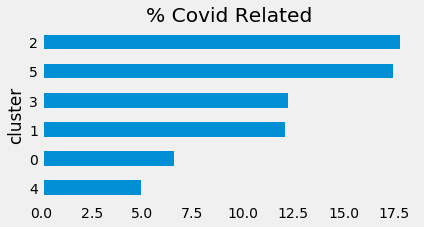

In [15]:
import matplotlib.style as style
style.use('fivethirtyeight')
covid_count = vector_df[['cluster', 'covid_related']].groupby(['cluster']).sum() 
cluster_count = vector_df[['cluster', 'covid_related']].groupby(['cluster']).count() 
covid_cluster_stats = (covid_count / cluster_count) * 100
covid_cluster_stats = covid_cluster_stats.sort_values(['covid_related'])
fig = covid_cluster_stats.plot.barh(grid=False, figsize=(6, 3), legend=False, title='% Covid Related');

### Research Papers since COVID

We plot the 1d compression of the 768-dimension document vector over time, with the clusters identified by color. Then we plot clusters 2 and 6. We see a big increase in the number of papers since COVID appeared

In [16]:
vector_since = vector_df.query('published > "2015-01-01" & (cluster==2 | cluster==6)').copy()
vector_since.loc[vector_since.published> '2020-06-30', 'published'] = pd.to_datetime('2020-03-30')
if len(vector_since) > 5000:
    vector_since = vector_since.sample(5000)
alt.Chart(vector_since).mark_point().encode(
       x=alt.X('published:T'),
       y=alt.Y('1d'),
       color= 'cluster:N'
    ).properties(
        title='CORD Research Papers since 2015',
        width=600,
        height=400
    ).configure_axis(
        grid=False
    ).configure_view(
        strokeWidth=0
    )

alt.Chart(...)

In [17]:
query ="""
Efforts to identify the underlying drivers of fear, anxiety and stigma that
fuel misinformation and rumor, particularly through social media.
"""
research_papers.search_2d(query)

/opt/conda/lib/python3.6/site-packages/cord/vectors.py:54: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  cord_matches = document_vectors.loc[cord_uids].copy()


HTML(value='<h4>\nEfforts to identify the underlying drivers of fear, anxiety and stigma that\nfuel misinforma…

alt.Chart(...)

In [18]:
import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
pd.options.display.max_colwidth=160

meta_df = pd.read_csv('../input/CORD-19-research-challenge/metadata.csv') # Or pd.read_csv()
meta_df = meta_df[['title', 'abstract', 'publish_time']].head(1000)
meta_df

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,abstract,publish_time
0,Sequence requirements for RNA strand transfer during nidovirus discontinuous subgenomic RNA synthesis,Nidovirus subgenomic mRNAs contain a leader sequence derived from the 5′ end of the genome fused to different sequences (‘bodies’) derived from the 3′ end. ...,2001-12-17
1,"Crystal structure of murine sCEACAM1a[1,4]: a coronavirus receptor in the CEA family","CEACAM1 is a member of the carcinoembryonic antigen (CEA) family. Isoforms of murine CEACAM1 serve as receptors for mouse hepatitis virus (MHV), a murine co...",2002-05-01
2,Synthesis of a novel hepatitis C virus protein by ribosomal frameshift,"Hepatitis C virus (HCV) is an important human pathogen that affects ∼100 million people worldwide. Its RNA genome codes for a polyprotein, which is cleaved ...",2001-07-16
3,Structure of coronavirus main proteinase reveals combination of a chymotrypsin fold with an extra α-helical domain,"The key enzyme in coronavirus polyprotein processing is the viral main proteinase, M(pro), a protein with extremely low sequence similarity to other viral a...",2002-07-01
4,Discontinuous and non-discontinuous subgenomic RNA transcription in a nidovirus,"Arteri-, corona-, toro- and roniviruses are evolutionarily related positive-strand RNA viruses, united in the order Nidovirales. The best studied nidoviruse...",2002-12-01
...,...,...,...
995,A comprehensive assessment of N-terminal signal peptides prediction methods,BACKGROUND: Amino-terminal signal peptides (SPs) are short regions that guide the targeting of secretory proteins to the correct subcellular compartments in...,2009-12-03
996,Exposure of cats to low doses of FeLV: seroconversion as the sole parameter of infection,"In felids, feline leukemia virus (FeLV) infection results in a variety of outcomes that range from abortive (virus readily eliminated and never detectable) ...",2009-10-28
997,ORION-VIRCAT: a tool for mapping ICTV and NCBI taxonomies,"Viruses, viroids and prions are the smallest infectious biological entities that depend on their host for replication. The number of pathogenic viruses is c...",2009-10-12
998,A large and accurate collection of peptidase cleavages in the MEROPS database,Peptidases are enzymes that hydrolyse peptide bonds in proteins and peptides. Peptidases are important in pathological conditions such as Alzheimer's diseas...,2009-11-02


### Preprocessing Text
To create the index, we need a list of the tokens in each string. The easiest way to do so is by using **gensim** or **NLTK** to tokenize each abstract into a list of tokens. Here we use **gensim**

In [19]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string

meta_df_tokens = meta_df.abstract.fillna('').apply(preprocess_string)

Now we create a **BM25Okapi** index from the tokens. We also implement a search function that returns the top 10 results from the search.
Note that in search wer are asking the index to return the dataframe indexes of the tokens most similar to the search string.

In [20]:
from rank_bm25 import BM25Okapi
import numpy as np

bm25_index = BM25Okapi(meta_df_tokens.tolist())

def search(search_string, num_results=10):
    search_tokens = preprocess_string(search_string)
    scores = bm25_index.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    return top_indexes

indexes = search('novel coronavirus treatment')
indexes

array([302, 896,  14, 431, 253, 230,  53, 411, 913,  28])

You can use the indexes to locate the rows in **meta_df** which best match the search terms

In [21]:
meta_df.loc[indexes, ['abstract', 'publish_time']]

,abstract,publish_time
302,"Severe acute respiratory syndrome (SARS) is a recently emerged infectious disease caused by a novel coronavirus, but its immunopathological mechanisms have ...",2004-04-01
896,BACKGROUND: Destruction of the architectural and subsequently the functional integrity of the lung following pulmonary viral infections is attributable to b...,2009-09-23
14,"Because of the constant threat posed by emerging infectious diseases and the limitations of existing approaches used to identify new pathogens, there is a g...",2003-11-17
431,"The recent SARS epidemic has boosted interest in the discovery of novel human and animal coronaviruses. By July 2007, more than 3000 coronavirus sequence re...",2007-10-02
253,"The N-terminal domain of the coronavirus nucleocapsid (N) protein adopts a fold resembling a right hand with a flexible, positively charged β-hairpin and a ...",2006-09-13
230,"BACKGROUND: Despite recent successes with biological agents as therapy for autoimmune inflammatory diseases such as rheumatoid arthritis (RA), many patients...",2006-09-12
53,"BACKGROUND: Severe acute respiratory syndrome (SARS) emerged in later February 2003, as a new epidemic form of life-threatening infection caused by a novel ...",2005-01-18
411,"In response to viral infection, the expression of numerous host genes, including predominantly a number of proinflammatory cytokines and chemokines, is usua...",2008-01-30
913,"Severe acute respiratory syndrome (SARS) is a newly emerging infectious disease caused by a novel coronavirus, SARS-coronavirus (SARS-CoV). The SARS-CoV spi...",2009-02-09
28,"BACKGROUND: Despite the passing of more than a year since the first outbreak of Severe Acute Respiratory Syndrome (SARS), efficient counter-measures are sti...",2004-06-06


In [22]:
meta_df.loc[search('novel coronavirus treatment')]

,title,abstract,publish_time
302,Plasma inflammatory cytokines and chemokines in severe acute respiratory syndrome,"Severe acute respiratory syndrome (SARS) is a recently emerged infectious disease caused by a novel coronavirus, but its immunopathological mechanisms have ...",2004-04-01
896,Inducible Bronchus-Associated Lymphoid Tissue Elicited by a Protein Cage Nanoparticle Enhances Protection in Mice against Diverse Respiratory Viruses,BACKGROUND: Destruction of the architectural and subsequently the functional integrity of the lung following pulmonary viral infections is attributable to b...,2009-09-23
14,Viral Discovery and Sequence Recovery Using DNA Microarrays,"Because of the constant threat posed by emerging infectious diseases and the limitations of existing approaches used to identify new pathogens, there is a g...",2003-11-17
431,CoVDB: a comprehensive database for comparative analysis of coronavirus genes and genomes,"The recent SARS epidemic has boosted interest in the discovery of novel human and animal coronaviruses. By July 2007, more than 3000 coronavirus sequence re...",2007-10-02
253,Amino acid residues critical for RNA-binding in the N-terminal domain of the nucleocapsid protein are essential determinants for the infectivity of coronavi...,"The N-terminal domain of the coronavirus nucleocapsid (N) protein adopts a fold resembling a right hand with a flexible, positively charged β-hairpin and a ...",2006-09-13
230,A New Arthritis Therapy with Oxidative Burst Inducers,"BACKGROUND: Despite recent successes with biological agents as therapy for autoimmune inflammatory diseases such as rheumatoid arthritis (RA), many patients...",2006-09-12
53,Expression profile of immune response genes in patients with Severe Acute Respiratory Syndrome,"BACKGROUND: Severe acute respiratory syndrome (SARS) emerged in later February 2003, as a new epidemic form of life-threatening infection caused by a novel ...",2005-01-18
411,Coronavirus Spike Protein Inhibits Host Cell Translation by Interaction with eIF3f,"In response to viral infection, the expression of numerous host genes, including predominantly a number of proinflammatory cytokines and chemokines, is usua...",2008-01-30
913,The spike protein of SARS-CoV — a target for vaccine and therapeutic development,"Severe acute respiratory syndrome (SARS) is a newly emerging infectious disease caused by a novel coronavirus, SARS-coronavirus (SARS-CoV). The SARS-CoV spi...",2009-02-09
28,Coronavirus 3CL(pro )proteinase cleavage sites: Possible relevance to SARS virus pathology,"BACKGROUND: Despite the passing of more than a year since the first outbreak of Severe Acute Respiratory Syndrome (SARS), efficient counter-measures are sti...",2004-06-06


In [23]:
import multiprocessing
from concurrent.futures import ThreadPoolExecutor, as_completed
from typing import Collection, Any

def is_notebook():
    try:
        from IPython import get_ipython
        return get_ipython().__class__.__name__ == "ZMQInteractiveShell"
    except (NameError, ImportError):
        return False

if is_notebook():
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm
    
def ifnone(a: Any, b: Any) -> Any:
    return b if a is None else a

def parallel(func, arr: Collection, max_workers: int = None):
    "Call `func` on every element of `arr` in parallel using `max_workers`."
    max_workers = ifnone(max_workers, multiprocessing.cpu_count())
    progress_bar = tqdm(arr)
    with ThreadPoolExecutor(max_workers=max_workers) as ex:
        futures_to_index = {ex.submit(func, o): i for i, o in enumerate(arr)}
        results = []
        for f in as_completed(futures_to_index):
            results.append((futures_to_index[f], f.result()))
            progress_bar.update()
        for n in range(progress_bar.n, progress_bar.total):
            time.sleep(0.1)
            progress_bar.update()
        results.sort(key=lambda x: x[0])
    return [result for i, result in results]

 Loading JSON


In [24]:
from functools import partial

def get_text(paper_json, text_key) -> str:
    """
    :param paper_json: The json
    :param text_key: the text_key - "body_text" or "abstract"
    :return: a text string with the sections
    """
    body_dict = collections.defaultdict(list)
    for rec in paper_json[text_key]:
        body_dict[rec['section']].append(rec['text'])

    body = ''
    for section, text_sections in body_dict.items():
        body += section + '\n\n'
        for text in text_sections:
            body += text + '\n\n'
    return body


get_body = partial(get_text, text_key='body_text')
get_abstract = partial(get_text, text_key='abstract')

def author_name(author_json):
    first = author_json.get('first')
    middle = "".join(author_json.get('middle'))
    last = author_json.get('last')
    if middle:
        return ' '.join([first, middle, last])
    return ' '.join([first, last])


def get_affiliation(author_json):
    affiliation = author_json['affiliation']
    institution = affiliation.get('institution', '')
    location = affiliation.get('location')
    if location:
        location = ' '.join(location.values())
    return f'{institution}, {location}'


def get_authors(paper_json, include_affiliation=False):
    if include_affiliation:
        return [f'{author_name(a)}, {get_affiliation(a)}'
                for a in paper_json['metadata']['authors']]
    else:
        return [author_name(a) for a in paper_json['metadata']['authors']]

The CORD research tool can be use to find papers specific for the tasks in this dataset. Here is an example

In [25]:
research_papers.display('dao10kx9', 'rjc3b4br',  'r0lduvs1', '7i422cht', 'pa9h6d0a', 'dbzrd23n', '5gbkrs73', '94tdt2rv', 
                        'xsgxd5sy', 'jf36as70', 'uz91cd6h')

title,summary,when,cord_uid
COVID-19: Challenges to GIS with Big Data,"In the fight against COVID-19, Geographic Information Systems (GIS) and big data technologies have played an important role in many aspects, including the rapid aggregation of multi-source big data, rapid visualization of epidemic information, spatial tracking of confirmed cases, prediction of regional transmission, spatial segmentation of the epidemic risk and prevention level, balancing and management of the supply and demand of material resources, and social-emotional guidance and panic elimination, which provided solid spatial information support for decision-making, measures formulation, and effectiveness assessment of COVID-19 prevention and control. Currently and for a long time in the future, the development of GIS should be strengthened to form a data-driven system for rapid knowledge acquisition, which signifies that GIS should be used to reinforce the social operation parameterization of models and methods, especially when providing support for social management.",1 month ago,5gbkrs73
"A Territory-wide study of COVID-19 cases and clusters with unknown source in Hong Kong community: A clinical, epidemiological and phylogenomic investigation","Background: Initial cases of coronavirus disease 2019 (COVID-19) reported in Hong Kong were mostly imported cases from Mainland China. This study aimed to report the clinical, epidemiological and phylogenomic characteristics of the local cases of COVID-19 in our community. Methods: We extracted the demographic, clinical and epidemiological data from 50 COVID-19 patients, who accounted for 53.8% of the cases in Hong Kong by the end of February 2020. The estimated time to the most recent common ancestor (tMRCA) of COVID-2019 outbreak in Hong Kong was December 24, 2019 with an evolutionary rate of 3.04x10-3 substitutions per site per year. The reproduction number value was 1.84 as of February 28, 2020 in Hong Kong.",1 month ago,uz91cd6h
Clinical Characteristics of 74 Children with Coronavirus Disease 2019,"Methods: We reviewed and analyzed data on pediatric patients with laboratory-confirmed COVID-19, including basic information, epidemiological history, clinical manifestations, laboratory and radiologic findings, treatment, outcome and follow-up results. Of the 34 (45.95%) patients who had nucleic acid testing results for common respiratory pathogens, 19 (19 / 34, 51.35%) showed co-infection with other pathogens other than SARS-CoV-2.Ten (13.51%) children had RT-PCR analysis of SARS-CoV-2 for fecal specimens and 8 of them showed prolonged existence of SARS-CoV-2 RNA 11 (5-23) days after nasopharynx swabs turning negative. During the follow-up period, all the patients remained in quarantine at designated site and home for two 14-day obervation periods and showed no clinical manifestation,but 3 of the 8 cases with prolonged fecal shedding of SARS-CoV-2 still showed positive result of feces test.",1 month ago,xsgxd5sy
AAEDM: Theoretical Dynamic Epidemic Diffusion Model and Covid-19 Korea Pandemic Cases,"This newly propose model well describes an epidemic growth and it could be widely applied into various topics including pathology, epidemiology, business and data sciences. The Advanced Analytical Epidemic Diffusion Model (AAEDM) is a dynamic diffusion prediction model which is theoretically intuitive and its tractable closed formula could be easily adapted into versatile Bigdata driven analytics including the machine learning system. This dynamic model is still an analytical model but the periods of prediction are segmented for adapting the values from the dataset when the data is available. The evaluation of this theoretical model based on the Covid-19 data in Korea has been accomplished with relative fair future prediction accuracies.",1 month ago,jf36as70
On the Coronavirus (COVID-19) Outbreak and the Smart City Network: Universal Data Sharing Standards Coupled with Artificial Intelligence (AI) to Benefit Urban

A more detailed notebook on **Information Sharing** is here https://www.kaggle.com/dgunning/cord-research-on-information-sharing

In [26]:
from typing import Dict, List
import requests

SPECTER_URL = "https://model-apis.semanticscholar.org/specter/v1/invoke"
MAX_BATCH_SIZE = 16

def chunks(lst, chunk_size=MAX_BATCH_SIZE):
    """Splits a longer list to respect batch size"""
    for i in range(0, len(lst), chunk_size):
        yield lst[i: i + chunk_size]


def get_embeddings_for_papers(papers: List[Dict[str, str]]):
    embeddings_by_paper_id: Dict[str, List[float]] = {}
    for chunk in chunks(papers):
        # Allow Python requests to convert the data above to JSON
        response = requests.post(SPECTER_URL, json=chunk)

        if response.status_code != 200:
            print("Something went wrong on the spector API side .. try again")
            return None

        for paper in response.json()["preds"]:
            embeddings_by_paper_id[paper["paper_id"]] = paper["embedding"]

    return embeddings_by_paper_id

def get_embeddings(title: str, abstract: str = None):
    abstract = abstract or title
    paper = {"paper_id": "paper", "title": title, "abstract": abstract}
    embeddings = get_embeddings_for_papers([paper])
    return embeddings['paper'] if embeddings else None

def plot_embeddings(vector):
    df = pd.DataFrame(vector)
    ax = df.plot.bar(figsize=(10,1))
    ax.get_legend().remove()
    ax.axes.set_xticklabels([])
    ax.axes.set_yticklabels([])

### Get the Embeddings



In [27]:
embeddings = get_embeddings('Animal to human transmission')

embeddings[:10]

[-0.987923264503479,
 -4.266862869262695,
 2.2286627292633057,
 1.88716459274292,
 0.48006191849708557,
 -3.4545392990112305,
 1.7945767641067505,
 -1.9362633228302002,
 2.3720009326934814,
 -2.134744644165039]

### Plot the embeddings

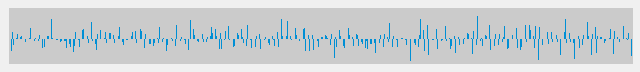

In [28]:
plot_embeddings(embeddings)